In [24]:
import sys
sys.path.append('..')
import time
from astropy.table import Table
import pyfits as fits
import numpy as np
import matplotlib.pyplot as plt
from os.path import expanduser
from deeplens.resnet_classifier import deeplens_classifier

from deeplens.utils.blfchallenge import classify_ground_challenge 

from sklearn import metrics

home = expanduser("~")

In [25]:
x_cluster_nonlens = np.zeros((23,3,101,101))
y_cluster_nonlens = np.zeros((23,1))
for i in range(17,40):
    x_cluster_nonlens[i-17] = fits.getdata('/Users/Chris/Desktop/DECals_set/Non-Lenses/cluster_images/fits_images/cluster_nonlens_{:06d}.fits'.format(i))
print x_cluster_nonlens.shape

(23, 3, 101, 101)


In [26]:
model_num = 12

# Path to the downloaded files
# download_path=home+'/Desktop/' # To be adjusted on your machine
download_path='//Volumes/CJSTORFER/' # To be adjusted on your machine



# Path to export the data
export_path=home+'/Desktop/'   # To be adjusted on your machine

x_train = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}_cluster_nonlens/x_y_sets/x_train.npy'.format(model_num))

y_train = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}_cluster_nonlens/x_y_sets/y_train.npy'.format(model_num))

xval = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}_cluster_nonlens/x_y_sets/xval.npy'.format(model_num))

yval = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}_cluster_nonlens/x_y_sets/yval.npy'.format(model_num))

In [27]:
print xval.shape

(60, 3, 101, 101)


In [28]:
x_cluster_nonlens = np.concatenate((x_cluster_nonlens,xval[55:]))

In [29]:
print x_cluster_nonlens.shape

(28, 3, 101, 101)


In [30]:
print 'max ', np.max(x_cluster_nonlens)
print 'min ', np.min(x_cluster_nonlens)
print 'mean ', np.mean(x_cluster_nonlens)
print 'std: ', np.std(x_cluster_nonlens)

max  100.0
min  -2.05159910023
mean  0.195837359194
std:  1.4886805906


In [31]:
x_cluster_nonlens.ravel()
x_cluster_nonlens*=3
clip = 5

x_cluster_nonlens = np.clip(x_cluster_nonlens, -clip, clip)*20

print 'max ', np.max(x_cluster_nonlens)
print 'min ', np.min(x_cluster_nonlens)
print 'mean ', np.mean(x_cluster_nonlens)
print 'std: ', np.std(x_cluster_nonlens)
x_cluster_nonlens.reshape(-1,3,101,101)
print x_cluster_nonlens.shape

max  100.0
min  -100.0
mean  6.43704902175
std:  19.2782871078
(28, 3, 101, 101)


In [32]:
model = deeplens_classifier(learning_rate=0.001, learning_rate_steps=3, learning_rate_drop=0.1, batch_size=128, n_epochs=80)
model.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}_cluster_nonlens/saves/deeplens_params_70.npy'.format(model_num), x_train, y_train)

loading from /Users/Chris/Desktop/DECals_set/Trained_Models/model_12_cluster_nonlens/saves/deeplens_params_70.npy...
Model loaded


In [33]:
prediction = model.predict_proba(x_cluster_nonlens)

prediction:  [  1.25861322e-06]


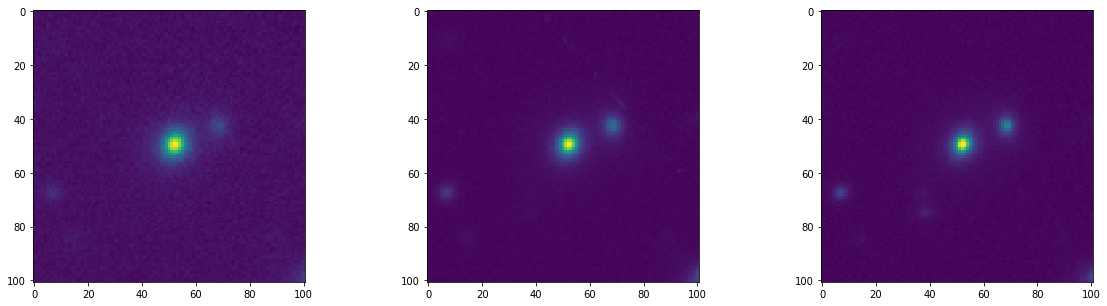

prediction:  [ 0.93996602]


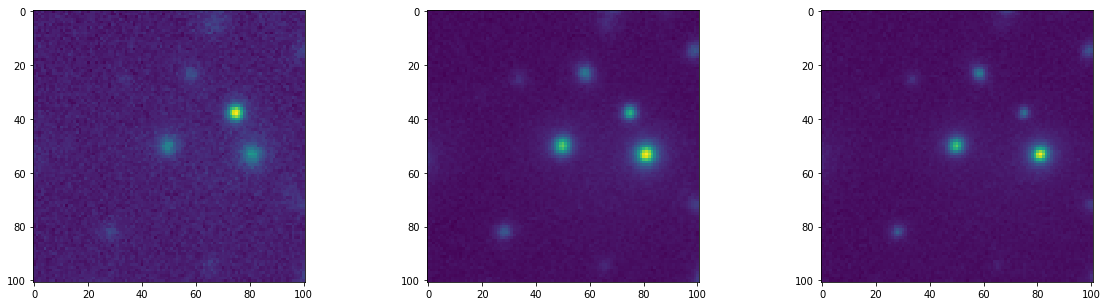

prediction:  [ 0.00020378]


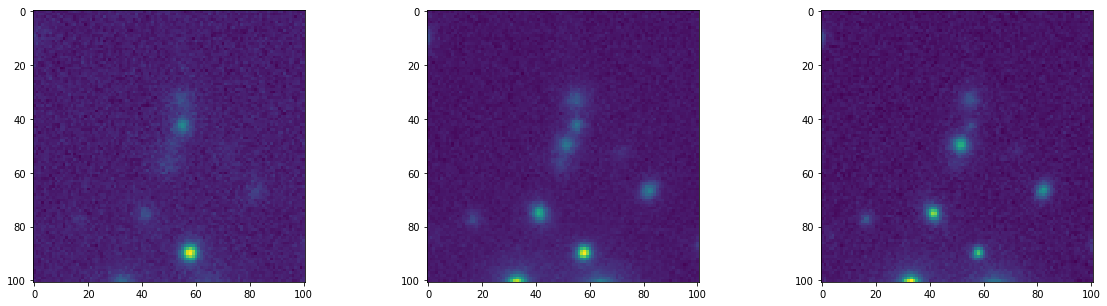

prediction:  [ 0.88460922]


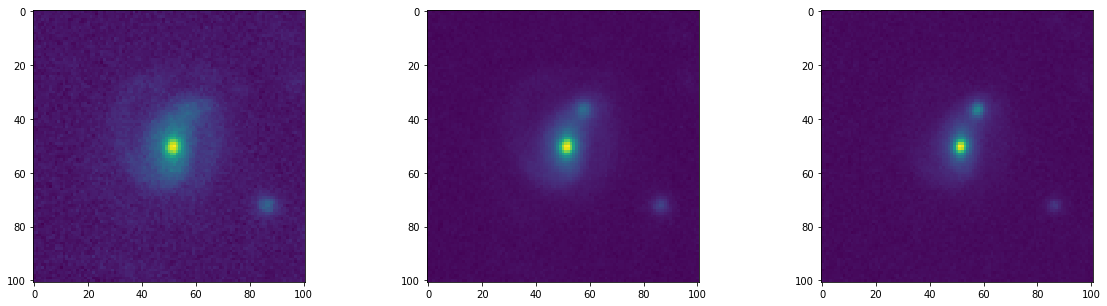

prediction:  [ 0.05449274]


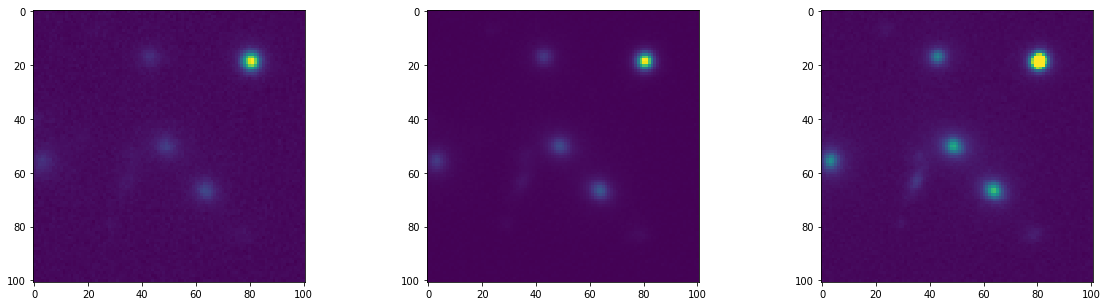

prediction:  [  2.15915497e-05]


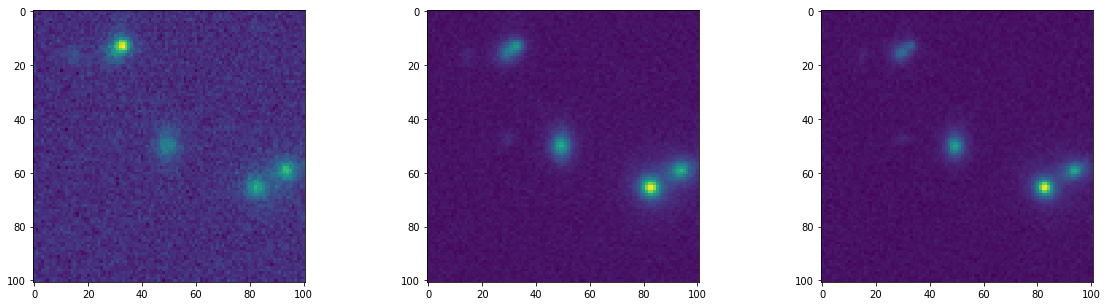

prediction:  [  1.15618093e-08]


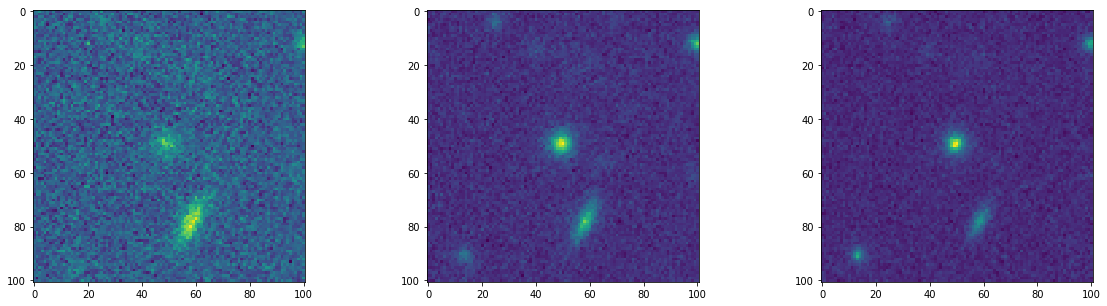

prediction:  [  1.31590905e-09]


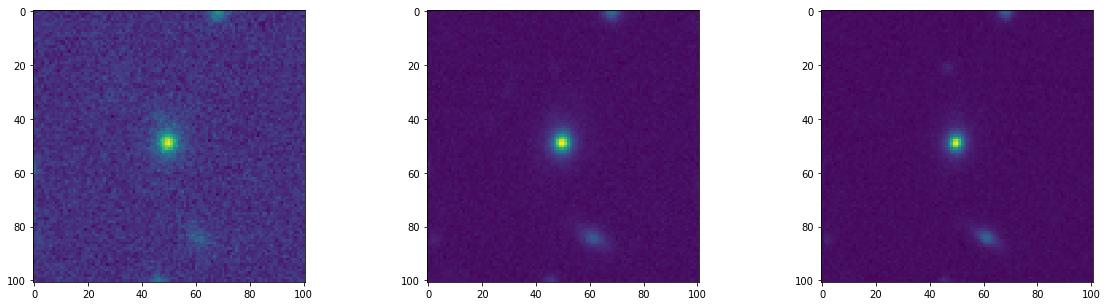

prediction:  [ 0.93996602]


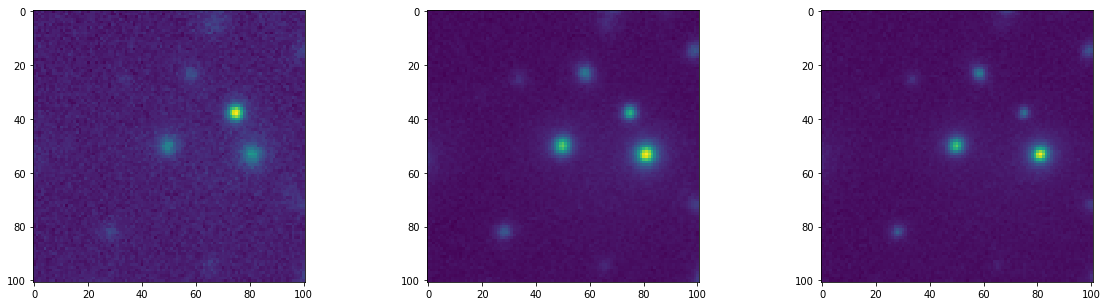

prediction:  [  1.25861322e-06]


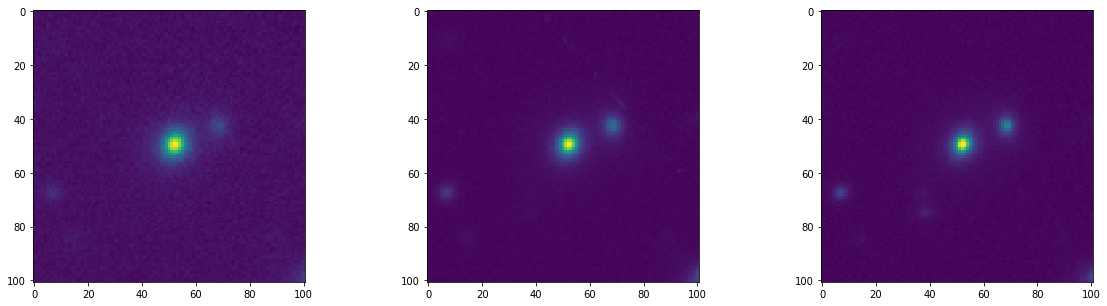

prediction:  [ 0.00020378]


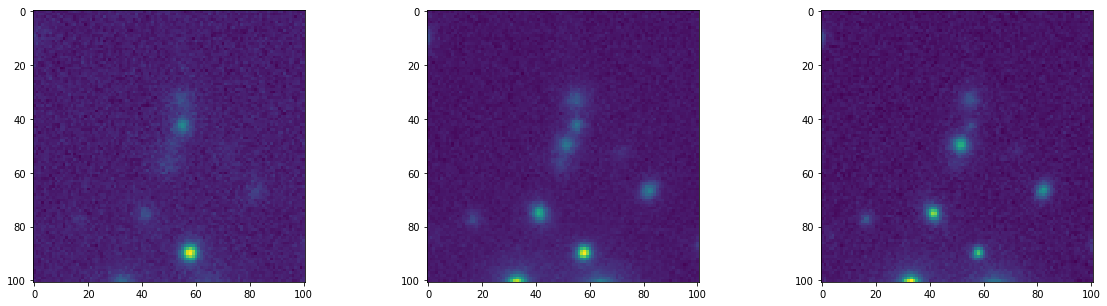

prediction:  [ 0.88460922]


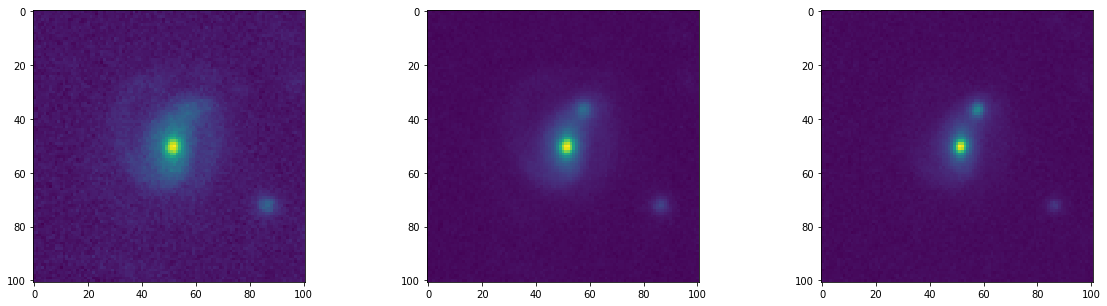

prediction:  [ 0.05449274]


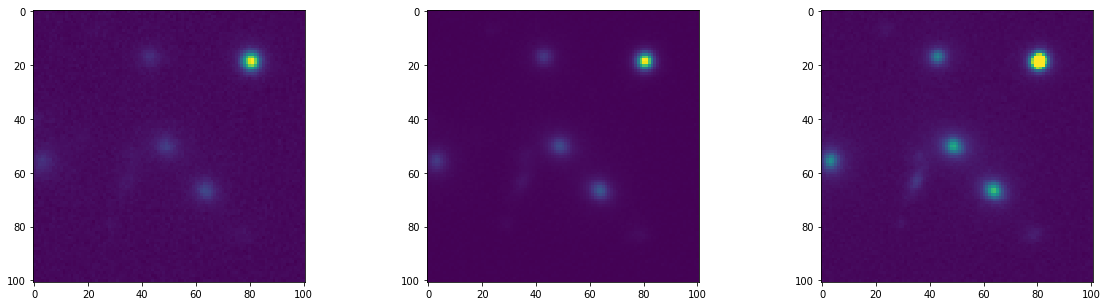

prediction:  [  2.15915497e-05]


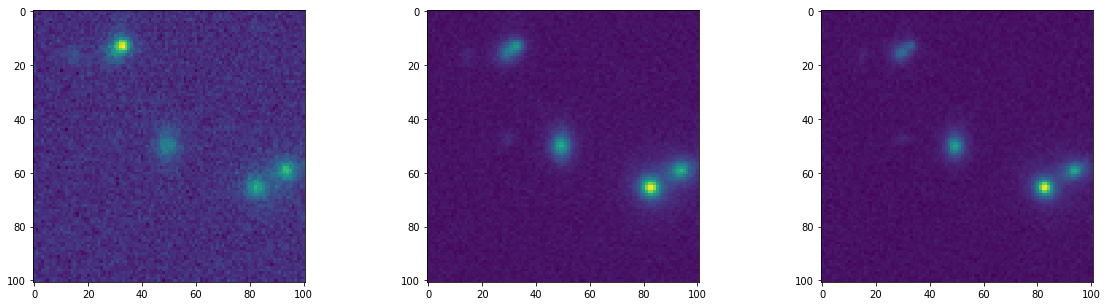

prediction:  [  1.15618093e-08]


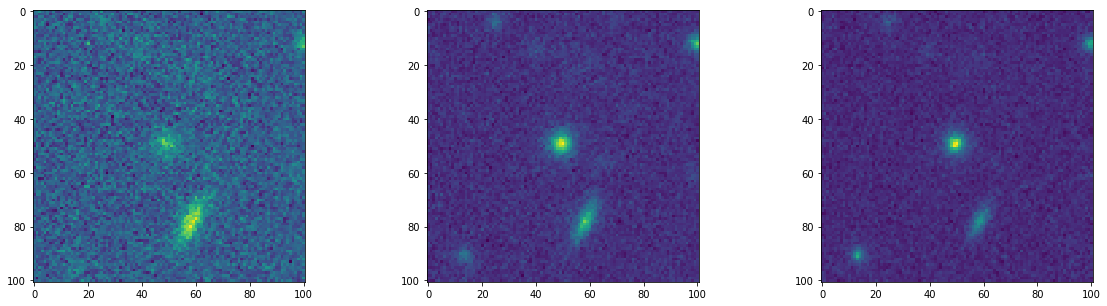

prediction:  [  1.31590905e-09]


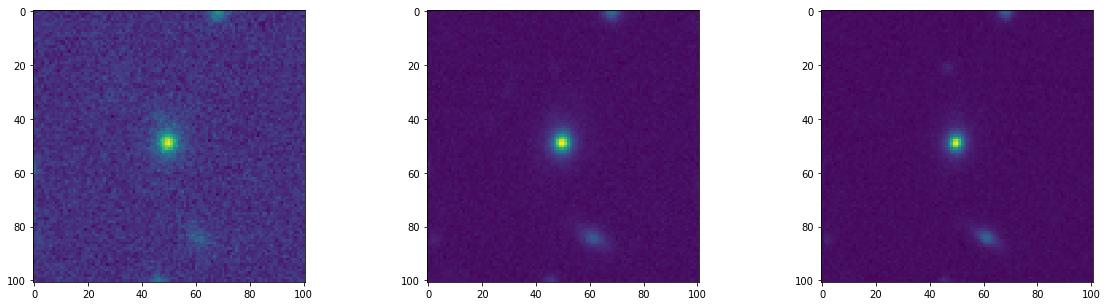

prediction:  [ 0.16575544]


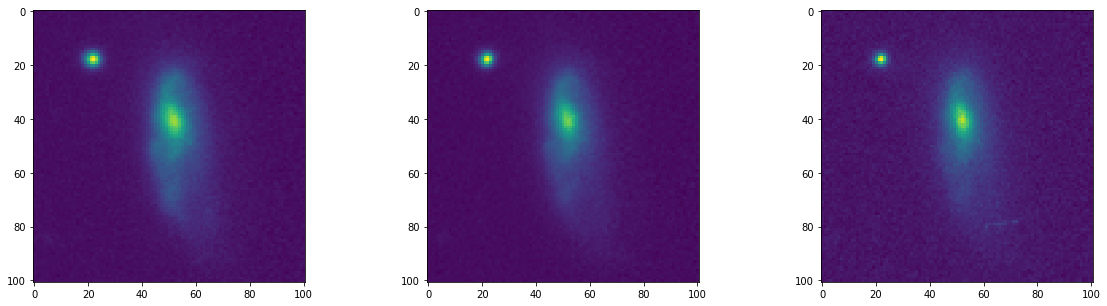

prediction:  [  2.17588891e-07]


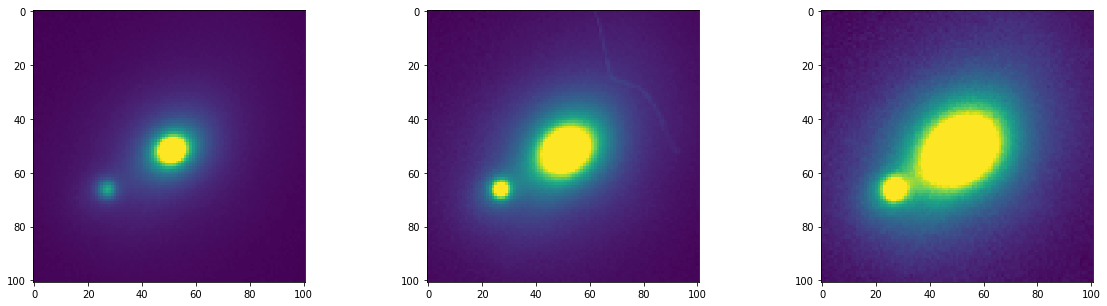

prediction:  [ 0.84371966]


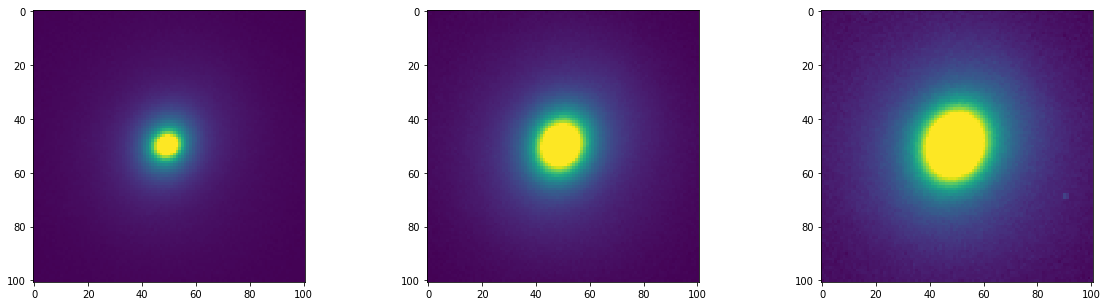

prediction:  [  3.49857671e-10]


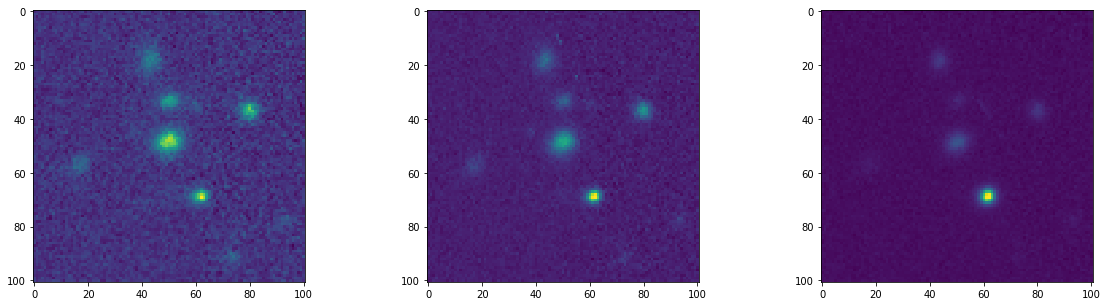

prediction:  [ 0.99970126]


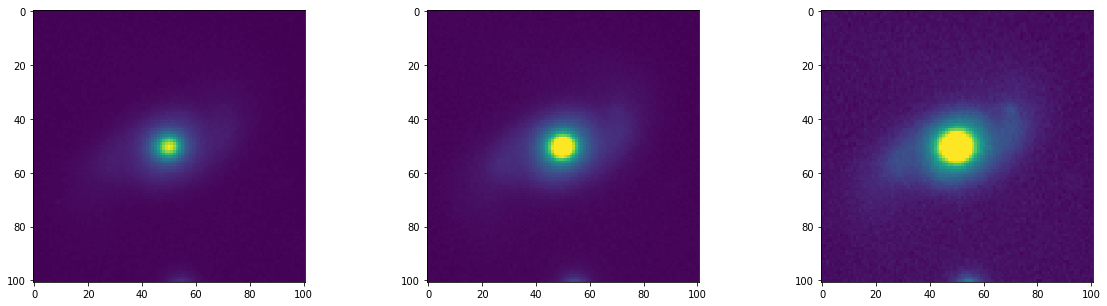

prediction:  [ 0.99995553]


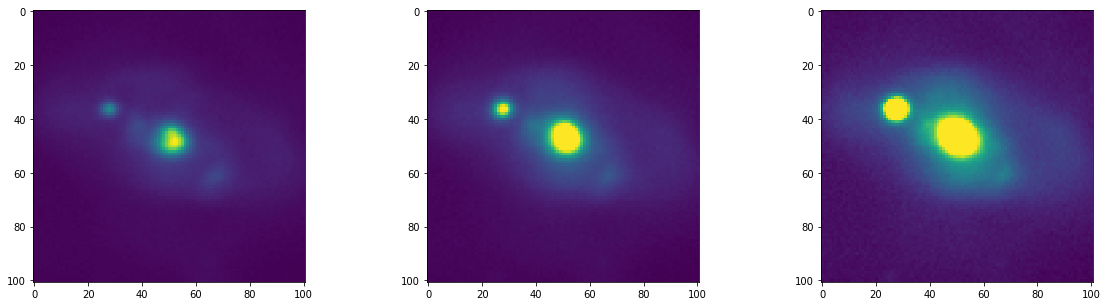

prediction:  [ 0.99999958]


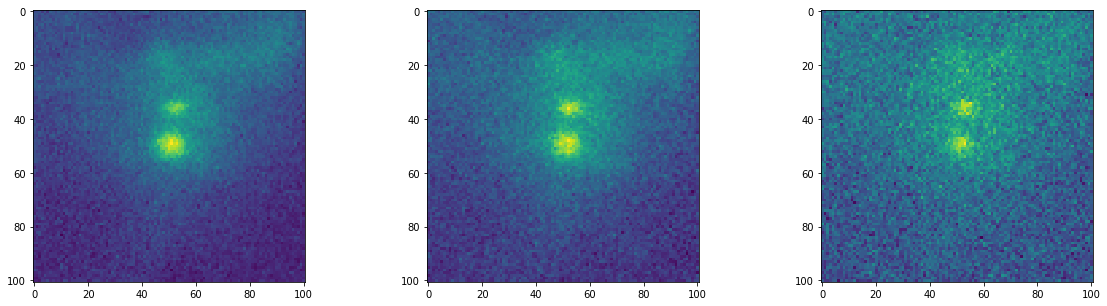

prediction:  [ 0.08247969]


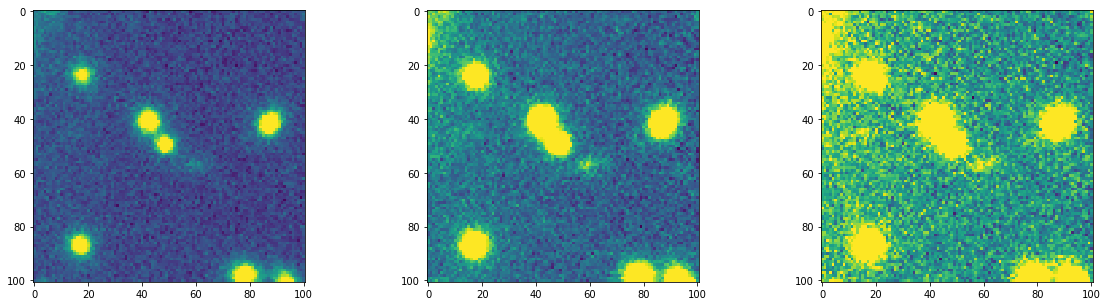

prediction:  [ 0.00031204]


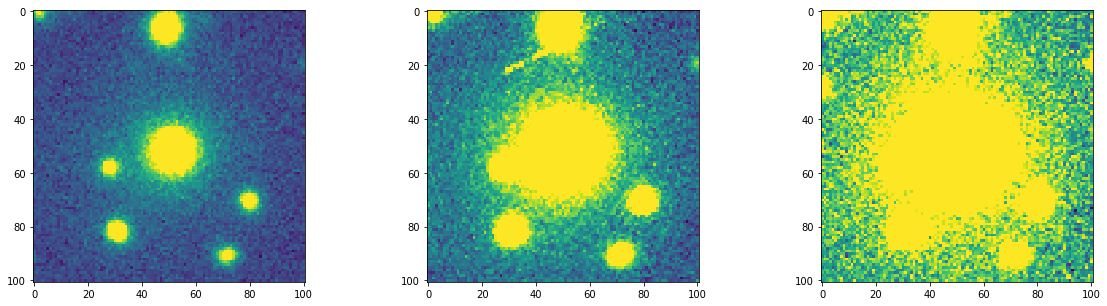

prediction:  [ 0.00752337]


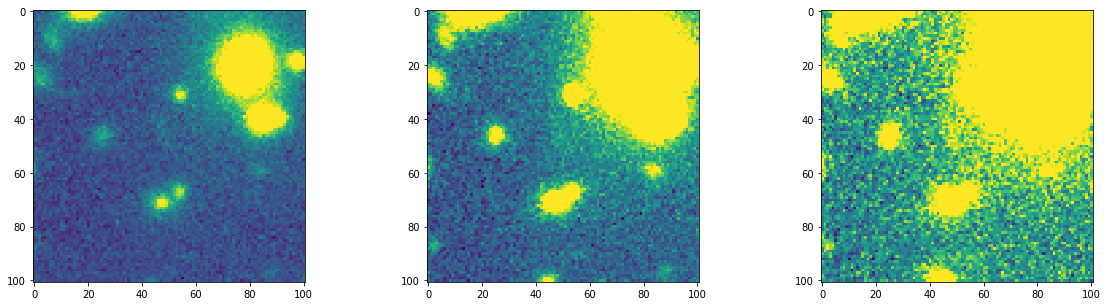

prediction:  [ 0.02007589]


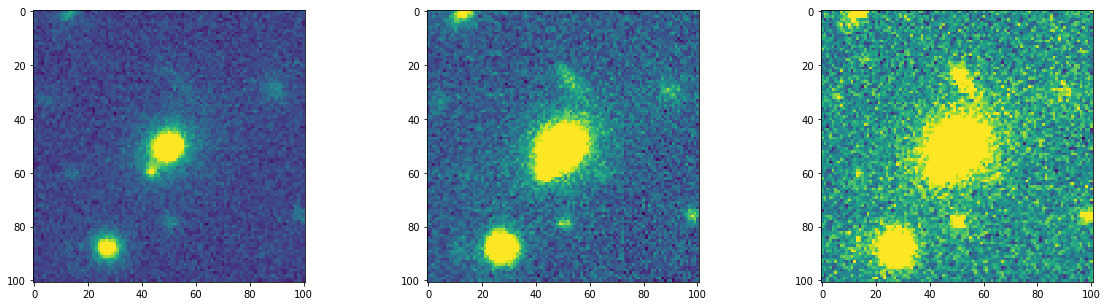

prediction:  [ 0.00778911]


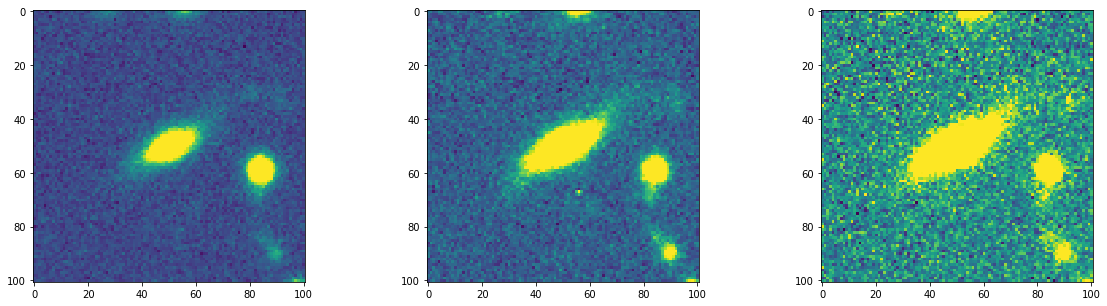

In [34]:
for i, pred in enumerate(prediction):
    print 'prediction: ',(pred)
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.imshow(x_cluster_nonlens[i][0].T)
    plt.subplot(132)
    plt.imshow(x_cluster_nonlens[i][1].T)
    plt.subplot(133)
    plt.imshow(x_cluster_nonlens[i][2].T)
    
    plt.show()

In [40]:
perc_FP = np.sum(prediction>=0.1)/float(prediction.shape[0])
print perc_FP

0.321428571429
